Data loaded successfully
First 5 rows
   CustomerID   Genre  Age  Annual_Income_(k$)  Spending_Score
0           1    Male   19                  15              39
1           2    Male   21                  15              81
2           3  Female   20                  16               6
3           4  Female   23                  16              77
4           5  Female   31                  17              40

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Genre               200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

 Missing Values in Dataset:
CustomerID            0
Genre                

C:\Users\Goldy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Goldy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Goldy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Goldy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

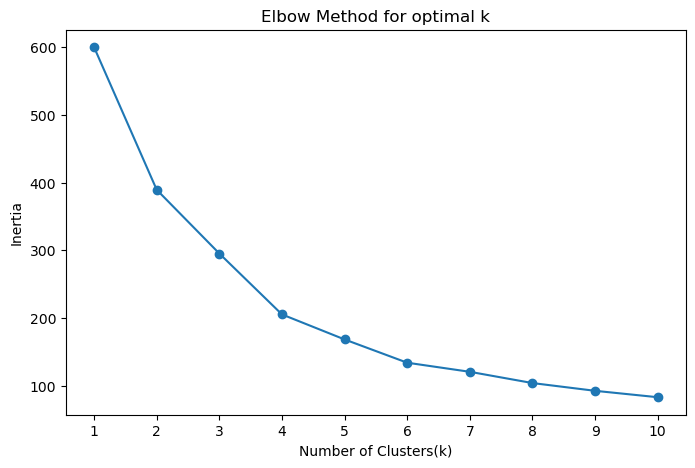

C:\Users\Goldy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


\ First 5 rows with cluster labels:
   CustomerID   Genre  Age  Annual_Income_(k$)  Spending_Score  cluster
0           1    Male   19                  15              39        0
1           2    Male   21                  15              81        0
2           3  Female   20                  16               6        0
3           4  Female   23                  16              77        0
4           5  Female   31                  17              40        0


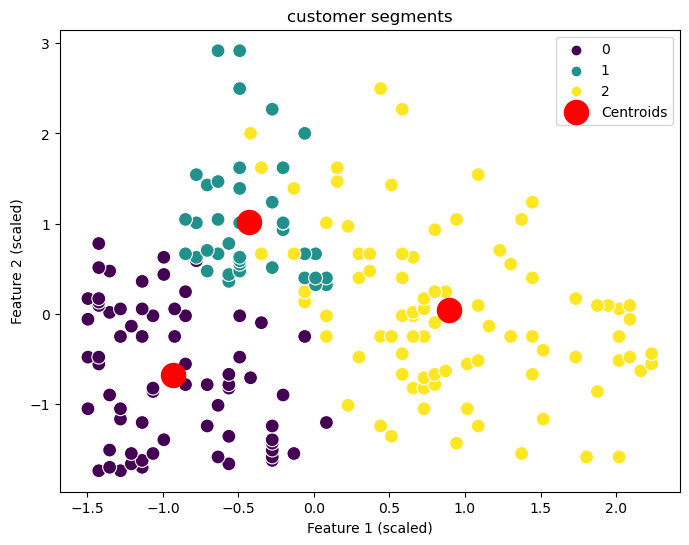

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


#load the dataset
dataset_path="Customers.csv"
df=pd.read_csv("Customers.csv")
print("Data loaded successfully")

#display the first 5 rows and info
print("First 5 rows")
print(df.head())

print("\nDataset Info:")
print(df.info())

#check for missing values
print("\n Missing Values in Dataset:")
print(df.isnull().sum())

#Data preprocessing
features = df[['Age','Annual_Income_(k$)','Spending_Score']]

#standardize the data
scaler=StandardScaler()
scaled_features=scaler.fit_transform(features)

#display the First few rows of the Standardized data
print("\n First few rows of scaled features:")
print(scaled_features[:5])
os.environ["OMP_NUM_THREADS"] = '1'

#Elbow Method to find the optimal number of clusters
inertia=[]
k_range=range(1,11)

for k in k_range:
    kmeans = KMeans(n_clusters=k,random_state=42,n_init=10)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)
    
#Plot the Elbow Method Graph
plt.figure(figsize=(8,5))
plt.plot(k_range,inertia,marker='o')
plt.title('Elbow Method for optimal k')
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.show()

optimal_k=3
kmeans=KMeans(n_clusters=optimal_k,random_state=42,n_init=10)
cluster_labels=kmeans.fit_predict(scaled_features)

#add cluster labels to the original dataset
df['cluster']=cluster_labels

#display
print("\ First 5 rows with cluster labels:")
print(df.head())

#visualization of the cluster
plt.figure(figsize=(8,6))
sns.scatterplot(x=scaled_features[:,0],y=scaled_features[:,1],hue=cluster_labels,palette='viridis',s=100)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='red',label='Centroids')
plt.title('customer segments')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.legend()
plt.show()

 


